# RNN for Classification

In [1]:
import os
import sys
import torch

import pandas as pd

import torch.nn as nn

from tqdm import tqdm

notebook_dir = os.getcwd()

sys.path.append(os.path.join(notebook_dir, '../'))

from data_processing import DataProcessing
from classification_models import SkLearnModelFactory, EvaluationMetric

In [2]:
pd.set_option('max_colwidth', 800)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load Data

In [3]:
predictions_df = DataProcessing.load_single_synthetic_data(notebook_dir, predictions=True, batch_idx=2)
predictions_df

/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/notebook_experiments/../data/prediction_logs/batch_2-prediction/batch_2-from_df.csv


,Base Sentence,Sentence Label,Domain,Model Name,API Name,Batch ID,Template Number
0,"Based on my analysis as a financial expert, I forecast that the stock price at Tesla will potentially decrease in Q3 of 2024.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,1
1,"On August 21, 2024, Goldman Sachs speculates that the net profit at Microsoft will likely increase in the following fiscal year.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,2
2,"JP Morgan Chase predicts that on January 1, 2025, the revenue of Amazon may rise significantly.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,3
3,"According to a report by BlackRock, the operating cash flow at Google's parent company, Alphabet, would fall in the second quarter of 2025.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,4
4,"In Q2 of 2025, a financial research advisor envisions that the research and development expenses at Johnson & Johnson have some probability to remain stable.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,5
5,"The trading volume of ExxonMobil should stay the same in the third quarter of 2025, according to a college student studying finance.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,6
6,A financial advisor predicts that the net profit at Procter & Gamble potentially decrease in 2026 Q2.,1,finance,mistral-small-3.1,NAVI_GATOR,0,1
7,"On 08/21/2024, a senior financial analyst speculates the revenue at Chevron will likely increase.",1,finance,mistral-small-3.1,NAVI_GATOR,0,2
8,"A financial expert predicts on 21 August 2024, the Johnson & Johnson stock price may rise.",1,finance,mistral-small-3.1,NAVI_GATOR,0,3
9,"According to a financial top executive, the operating income at Boeing would fall in 2025 Q3.",1,finance,mistral-small-3.1,NAVI_GATOR,0,4


In [4]:
observations_df = DataProcessing.load_single_synthetic_data(notebook_dir, predictions=False)
observations_df

/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/notebook_experiments/../data/observation_logs/batch_7-observation/batch_7-from_df.csv


,Base Sentence,Sentence Label,Domain,Model Name,API Name,Batch ID,Template Number
0,JPMorgan Chase observed that the operating income at Microsoft had increased significantly in September 2027.,0,finance,llama-3.3-70b-versatile,GROQ_CLOUD,0,1
1,"On November 10, 2024, to November 10, 2025, Citigroup monitored the research and development expenses at Amazon and saw it changed.",0,finance,llama-3.3-70b-versatile,GROQ_CLOUD,0,2
2,"BlackRock noted on February 2, 2026, the S&P 500 index at Goldman Sachs fell.",0,finance,llama-3.3-70b-versatile,GROQ_CLOUD,0,3
3,"According to Visa, the net profit at Mastercard rose in the fourth quarter of 2028.",0,finance,llama-3.3-70b-versatile,GROQ_CLOUD,0,4
4,"In January 2029, Wells Fargo envisioned that the dividend yield at Coca-Cola decreased.",0,finance,llama-3.3-70b-versatile,GROQ_CLOUD,0,5
5,"The stock price of Nike increased in October 2025, according to a financial analyst at Barclays.",0,finance,llama-3.3-70b-versatile,GROQ_CLOUD,0,6
6,Morgan Stanley observed that the revenue at FUBU (his parents clothing line) had increased for Q3 2028.,0,finance,llama-3.1-8b-instant,GROQ_CLOUD,0,1
7,"On 2024-08-21, Goldman Sachs monitored the operating cash flow at UF's school of Engineering and saw it decreased.",0,finance,llama-3.1-8b-instant,GROQ_CLOUD,0,2
8,Morgan Stanley noted that the ETFs in his portfolio exponentially grew from 21 Aug 2024 to 2024/08/21.,0,finance,llama-3.1-8b-instant,GROQ_CLOUD,0,3
9,"According to Chase Bank, the returns at emerging market equities fell in May 2035.",0,finance,llama-3.1-8b-instant,GROQ_CLOUD,0,4


## Data Processing

In [5]:
sentence_labels = []
prediction_sentence_label = int(predictions_df['Sentence Label'].unique())
observation_sentence_label = int(observations_df['Sentence Label'].unique())
sentence_labels.append(prediction_sentence_label)
sentence_labels.append(observation_sentence_label)
print(sentence_labels)

[1, 0]


/var/folders/78/9z0b45fx1xqbwxh8vk97lcfh0000gn/T/ipykernel_54224/1923887029.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction_sentence_label = int(predictions_df['Sentence Label'].unique())
/var/folders/78/9z0b45fx1xqbwxh8vk97lcfh0000gn/T/ipykernel_54224/1923887029.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  observation_sentence_label = int(observations_df['Sentence Label'].unique())


In [6]:
mappings = {}
mappings[prediction_sentence_label] = list(predictions_df['Base Sentence'].values)
mappings[observation_sentence_label] = list(observations_df['Base Sentence'].values)
mappings

{1: ['Based on my analysis as a financial expert, I forecast that the stock price at Tesla will potentially decrease in Q3 of 2024.',
  'On August 21, 2024, Goldman Sachs speculates that the net profit at Microsoft will likely increase in the following fiscal year.',
  'JP Morgan Chase predicts that on January 1, 2025, the revenue of Amazon may rise significantly.',
  "According to a report by BlackRock, the operating cash flow at Google's parent company, Alphabet, would fall in the second quarter of 2025.",
  'In Q2 of 2025, a financial research advisor envisions that the research and development expenses at Johnson & Johnson have some probability to remain stable.',
  'The trading volume of ExxonMobil should stay the same in the third quarter of 2025, according to a college student studying finance.',
  'A financial advisor predicts that the net profit at Procter & Gamble potentially decrease in 2026 Q2.',
  'On 08/21/2024, a senior financial analyst speculates the revenue at Chevron

In [7]:
import spacy

# Lazy loading - only load models when first used
_embedding_models = {}

def get_embedding_model(model_name):
    if model_name not in _embedding_models:
        model_map = {
            'spacy_medium': 'en_core_web_md',
            'spacy_large': 'en_core_web_lg',
        }
        _embedding_models[model_name] = spacy.load(model_map[model_name])
    return _embedding_models[model_name]

def embed_sentence(sentence, embedding_model_name='spacy_medium'):
    model = get_embedding_model(embedding_model_name)
    doc = model(sentence)  # Call model directly, not model.nlp
    return doc.vector  # Returns sentence embedding as numpy array

In [8]:
input_embedding = embed_sentence(mappings[1][0], 'spacy_large')
torch_embedding = torch.tensor(input_embedding)
print(f"torch_embedding size: {torch_embedding.size()}")

torch_embedding size: torch.Size([300])


## Network

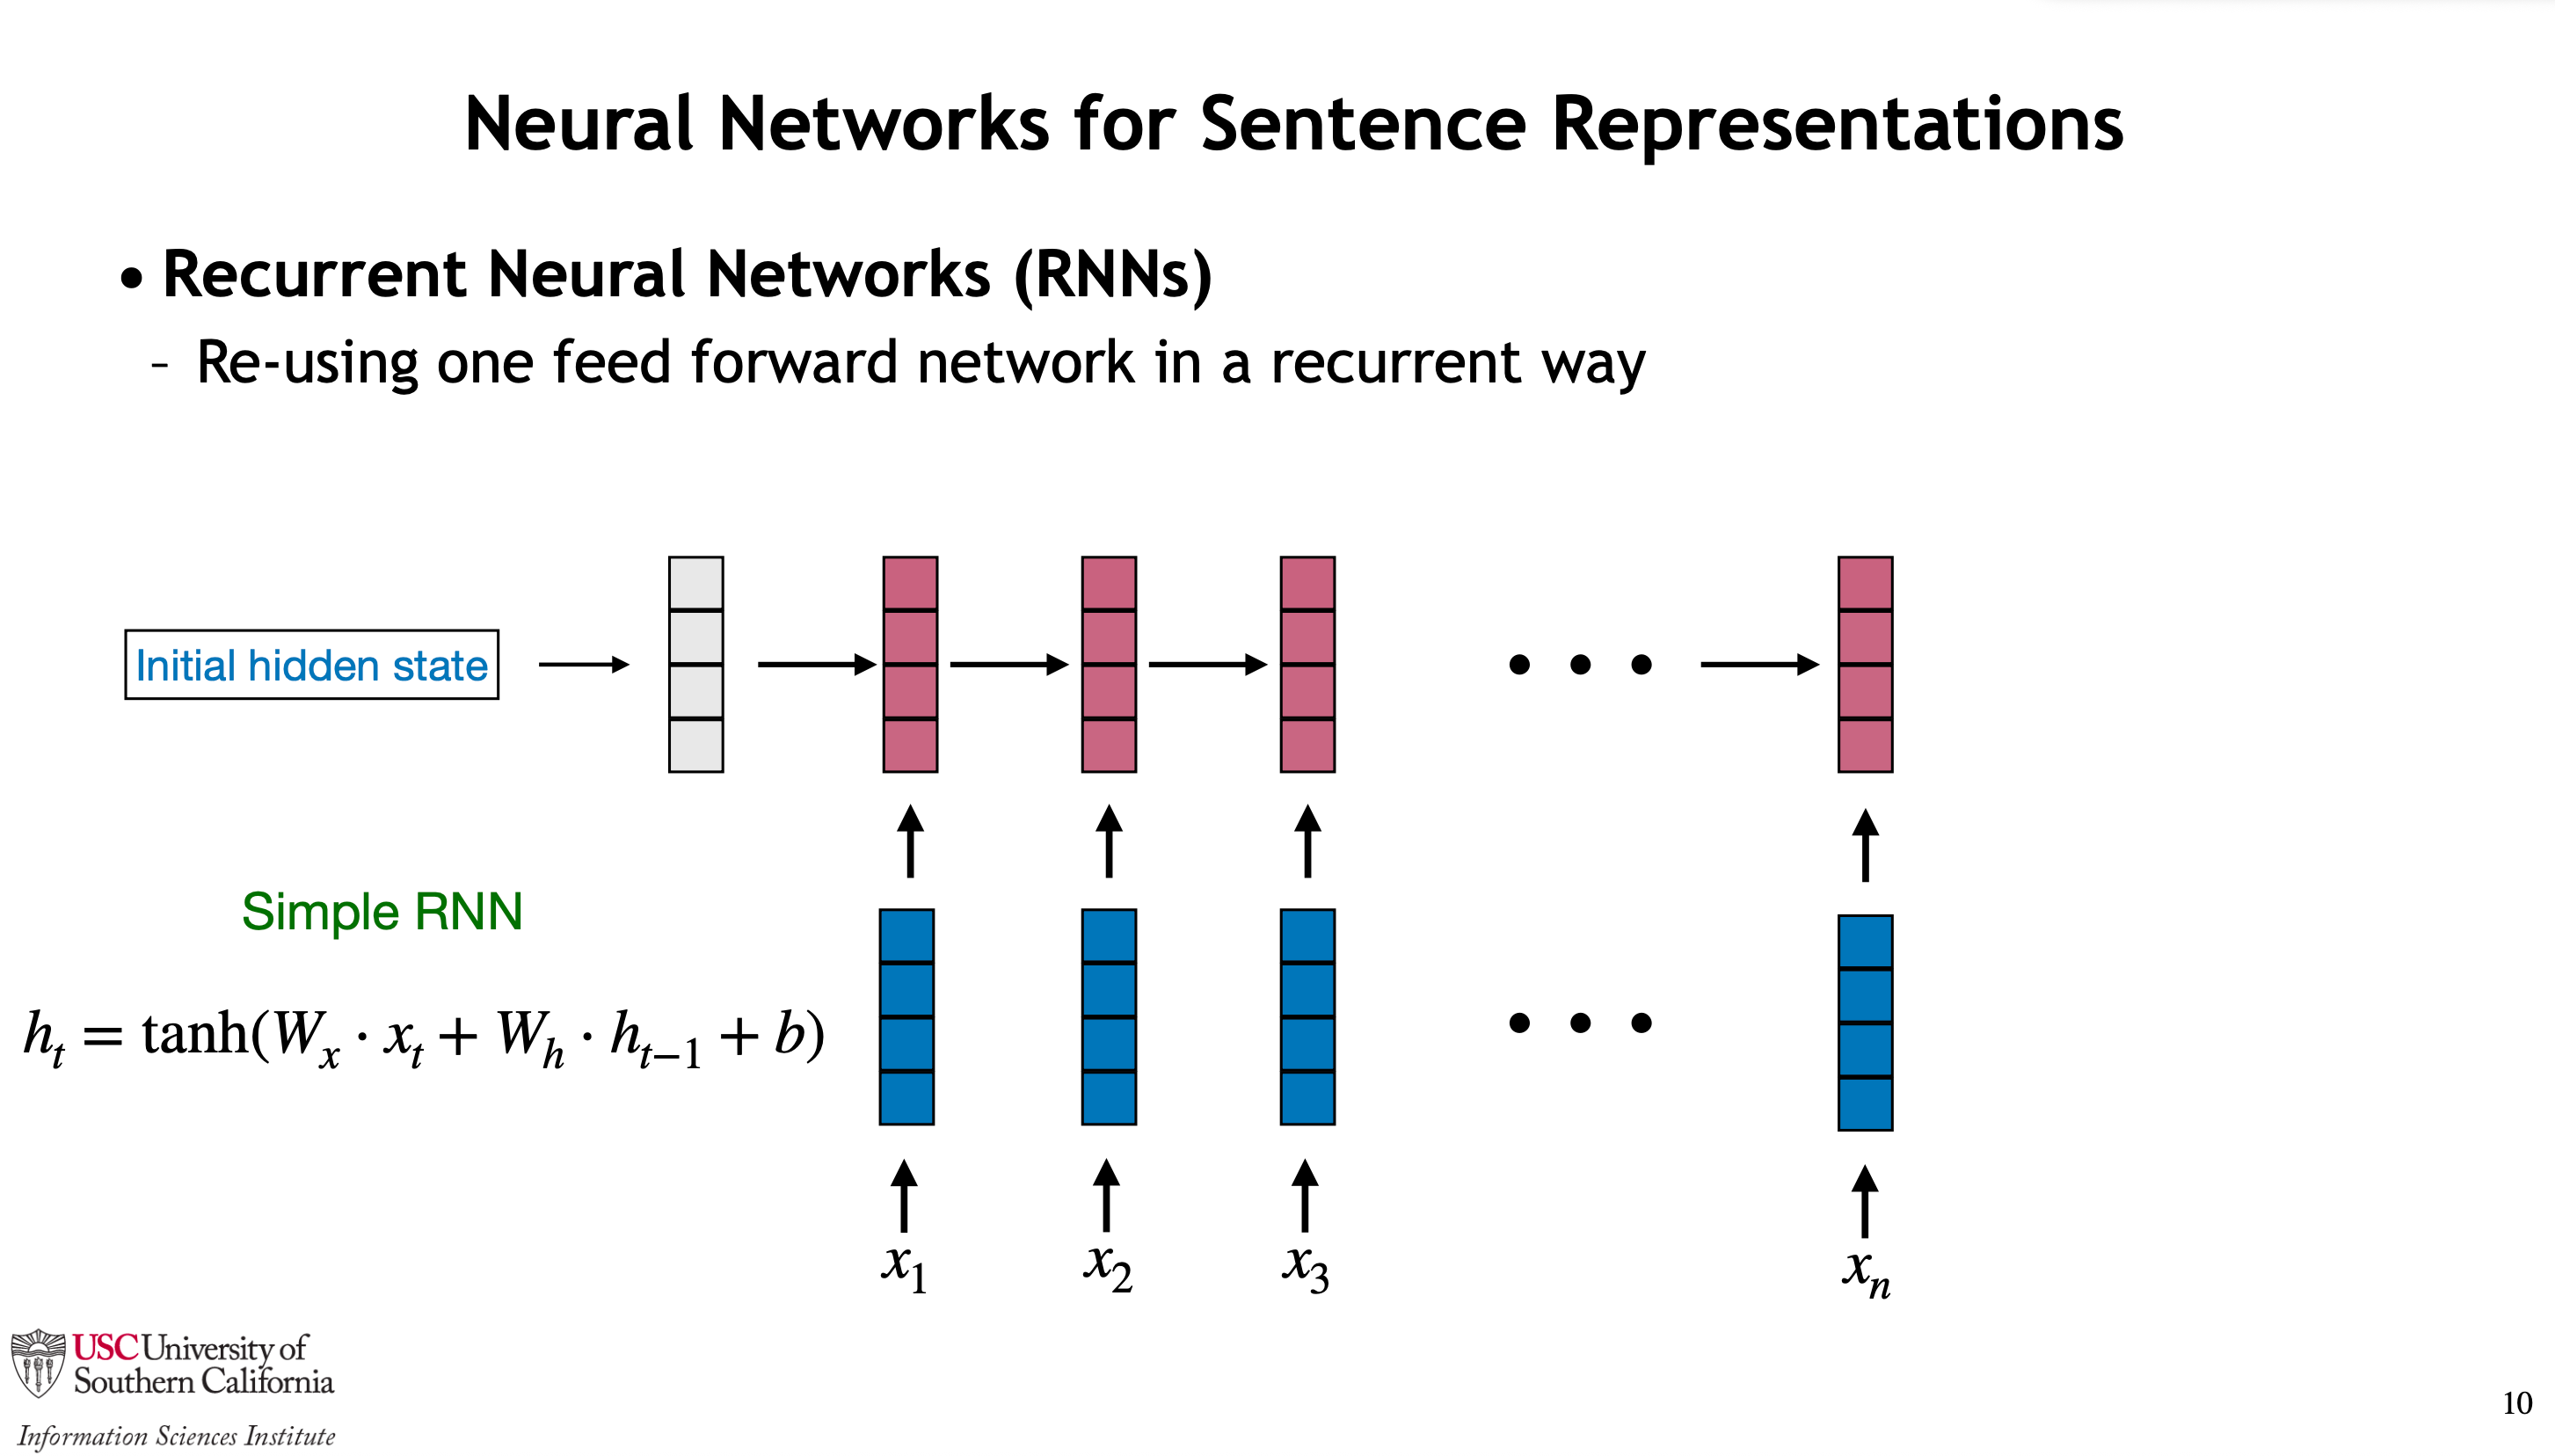

In [9]:
class RNN(nn.Module):
    """Specify size for each layer of the RNN"""
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        print(f"### RNN Layers and Sizes ###")
        self.hidden_size = hidden_size

        self.input_hidden_to_hidden = nn.Linear(in_features=input_size + hidden_size, out_features=hidden_size)
        # print(f"self.input_hidden_to_hidden: {self.input_hidden_to_hidden}")

        self.input_hidden_to_output = nn.Linear(in_features=input_size + hidden_size, out_features=output_size)
        # print(f"self.input_hidden_to_output: {self.input_hidden_to_output}")

        self.softmax = nn.LogSoftmax(dim=1)
        # print(f"self.softmax: {self.softmax}")

    def forward(self, input_tensor, hidden_tensor):
        """Perform computation for RNN with the parameter to each attribute is proper size as initiated"""

        # print("### Computations for RNN Layers ###")
        # print("\t1. Concat tensors: input (x) and hidden (h)")
        input_to_hidden = torch.cat((input_tensor, hidden_tensor), 1) # gives the network access to both current info and memory
        # print(f"\t\tinput_to_hidden size: {input_to_hidden.size()}")

        # print("\t2a. For current input, get hidden state ")
        hidden = self.input_hidden_to_hidden(input_to_hidden) # memory for the NEXT timestep bc we want to maintain information across time
        # print(f"\t\thidden size: {hidden.size()}")

        # print("\t2b. For current input, get output state (sentence label)")
        model_prediction = self.input_hidden_to_output(input_to_hidden) # make the actual prediction
        # print(f"\t\tmodel_prediction size: {model_prediction.size()}")

        # print("\t3. Convert model prediction to number between (0 and 1)")
        output = self.softmax(model_prediction) # converts to probabilities for classification
        # print(f"\t\toutput size: {output.size()}\n\t\toutput: {output}")
        return hidden, output
    
    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)

In [10]:
data_length = len(predictions_df) + len(observations_df)
hidden_size = 128
rnn = RNN(300, hidden_size, len(sentence_labels))
rnn

### RNN Layers and Sizes ###


RNN(
  (input_hidden_to_hidden): Linear(in_features=428, out_features=128, bias=True)
  (input_hidden_to_output): Linear(in_features=428, out_features=2, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [11]:
resized_torch_embedding =  torch_embedding.unsqueeze(0)
print(f"resized_torch_embedding size: {resized_torch_embedding.size()}")

hidden_embedding = rnn.init_hidden()
print(f"hidden_embedding size: {hidden_embedding.size()}\n")

next_hidden, output = rnn(resized_torch_embedding, hidden_embedding)

resized_torch_embedding size: torch.Size([1, 300])
hidden_embedding size: torch.Size([1, 128])



$$
\begin{array}{ccc}
[\text{a}, & \text{b}] & \text{, where a and b are float values for each class} \\
\downarrow & \downarrow \\
\text{index 0} & \text{index 1} & \leftarrow \text{argmax picks index with highest value} \\
\downarrow & \downarrow \\
\text{sentence\_labels[0]} & \text{sentence\_labels[1]} & \leftarrow \text{prediction} &
\end{array}
$$


In [12]:
def map_model_output_to_label(output, sentence_labels):
    # print(f"output: {output}")
    # print(f"idx of highest value: {torch.argmax(output)}")
    idx = torch.argmax(output).item()
    # print(f"from sentence_labels: {sentence_labels}, classify sentence with label: {sentence_labels[idx]}")
    
    # Ensure idx is within valid range
    if idx < 0 or idx >= len(sentence_labels):
        raise ValueError(f"Model predicted index {idx} but only {len(sentence_labels)} labels exist")

    return sentence_labels[idx]

In [13]:
map_model_output_to_label(output, sentence_labels)

0

## Entire Trainset

In [14]:
criterion = nn.NLLLoss()
learning_rate = 0.005
optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)

def train(input_embedding, correct_sentence_label):
    hidden_embedding = rnn.init_hidden()
    # print(f"hidden_embedding size: {hidden_embedding.size()}\n")

    torch_embedding = torch.tensor(input_embedding)
    # print(f"torch_embedding size: {torch_embedding.size()}")
    
    resized_torch_embedding =  torch_embedding.unsqueeze(0)
    # print(f"resized_torch_embedding size: {resized_torch_embedding.size()}")

    next_hidden, output = rnn(resized_torch_embedding, hidden_embedding)
    
    loss = criterion(output, correct_sentence_label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return output, loss.item()

In [15]:
current_loss = 0
sentences_per_iteration = 0
all_losses = []
plot_steps, print_steps = 10, 10
n_iters = 100

sentence_predictions = []
for i in tqdm(range(n_iters)):
    for label_value, sentences in mappings.items():
        torch_correct_sentence_label = torch.as_tensor([label_value], dtype=torch.long)
        for sentences_idx in range(len(sentences[:3])):
            sentence = sentences[sentences_idx]
            embeded_sentence = embed_sentence(sentence, 'spacy_large')
            
            output, loss = train(embeded_sentence, torch_correct_sentence_label)
            current_loss += loss 
            sentences_per_iteration += 1
            
            rnn_predicted_label = map_model_output_to_label(output, sentence_labels)
            # sentence_prediction = {
            #     'sentence': sentence,
            #     'true_label': label_value,
            #     'rnn_predicted_label': rnn_predicted_label
            # } 
            # print(sentence_prediction)
            # sentence_predictions.append(sentence_prediction)
            

            # if rnn_predicted_label == 1 and label_value == 1:
            #     print(f"Iter {i+1} | true_label: {label_value} vs rnn_predicted_label: {rnn_predicted_label} >>> CORRECT; TRUE POSITIVE")
            # elif rnn_predicted_label == 0 and label_value == 0:
            #     print(f"Iter {i+1} | true_label: {label_value} vs rnn_predicted_label: {rnn_predicted_label} >>> CORRECT; TRUE NEGATIVE")
            # elif rnn_predicted_label == 1 and label_value == 0:
            #     print(f"Iter {i+1} | true_label: {label_value} vs rnn_predicted_label: {rnn_predicted_label} >>> WRONG; FALSE POSITIVE")
            # elif rnn_predicted_label == 0 and label_value == 1:
            #     print(f"Iter {i+1} | true_label: {label_value} vs rnn_predicted_label: {rnn_predicted_label} >>> WRONG; FALSE NEGATIVE")
            

    # Track loss every 10 iterations (OUTSIDE loops)
    if (i+1) % plot_steps == 0:
        all_losses.append(current_loss / sentences_per_iteration)
        print(f"\n--- Iteration {i+1}: Avg Loss = {current_loss / sentences_per_iteration:.4f} ---\n")
        current_loss = 0
        sentences_per_iteration = 0

 15%|█▌        | 15/100 [00:00<00:01, 46.19it/s]


--- Iteration 10: Avg Loss = 0.6962 ---



 25%|██▌       | 25/100 [00:00<00:01, 44.90it/s]


--- Iteration 20: Avg Loss = 0.6729 ---



 35%|███▌      | 35/100 [00:00<00:01, 45.18it/s]


--- Iteration 30: Avg Loss = 0.6509 ---



 45%|████▌     | 45/100 [00:00<00:01, 46.82it/s]


--- Iteration 40: Avg Loss = 0.6300 ---



 55%|█████▌    | 55/100 [00:01<00:00, 47.80it/s]


--- Iteration 50: Avg Loss = 0.6102 ---



 65%|██████▌   | 65/100 [00:01<00:00, 48.41it/s]


--- Iteration 60: Avg Loss = 0.5914 ---



 75%|███████▌  | 75/100 [00:01<00:00, 48.67it/s]


--- Iteration 70: Avg Loss = 0.5737 ---



 85%|████████▌ | 85/100 [00:01<00:00, 47.42it/s]


--- Iteration 80: Avg Loss = 0.5568 ---



 95%|█████████▌| 95/100 [00:02<00:00, 47.14it/s]


--- Iteration 90: Avg Loss = 0.5408 ---



100%|██████████| 100/100 [00:02<00:00, 47.02it/s]


--- Iteration 100: Avg Loss = 0.5256 ---



In [16]:
test_predictions_df = DataProcessing.load_single_synthetic_data(notebook_dir, predictions=True, batch_idx=3)
test_observations_df = DataProcessing.load_single_synthetic_data(notebook_dir, predictions=False, batch_idx=9)
test_sentences_df = DataProcessing.concat_dfs([test_predictions_df, test_observations_df])

test_sentence_labels = []
test_prediction_sentence_label = int(test_predictions_df['Sentence Label'].unique())
test_observation_sentence_label = int(test_observations_df['Sentence Label'].unique())
test_sentence_labels.append(test_prediction_sentence_label)
sentence_labels.append(test_observation_sentence_label)
print(sentence_labels)

test_mappings = {}
test_mappings[test_prediction_sentence_label] = list(test_predictions_df['Base Sentence'].values)
test_mappings[test_observation_sentence_label] = list(test_observations_df['Base Sentence'].values)
test_mappings

/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/notebook_experiments/../data/prediction_logs/batch_3-prediction/batch_3-from_df.csv
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/notebook_experiments/../data/observation_logs/batch_9-observation/batch_9-from_df.csv
[1, 0, 0]


/var/folders/78/9z0b45fx1xqbwxh8vk97lcfh0000gn/T/ipykernel_54224/2705237119.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test_prediction_sentence_label = int(test_predictions_df['Sentence Label'].unique())
/var/folders/78/9z0b45fx1xqbwxh8vk97lcfh0000gn/T/ipykernel_54224/2705237119.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test_observation_sentence_label = int(test_observations_df['Sentence Label'].unique())


{1: ['Emily Chen, a financial analyst, forecasts that the net profit at Amazon potentially decrease in Q3 of 2027.',
  'On August 21, 2024, JPMorgan Chase speculates the operating income at Microsoft will likely increase.',
  'Bank of America predicts on 2024-08-21, the research and development expenses at Alphabet may rise.',
  'According to Citigroup, the revenue at Facebook would fall in 2025 Q2.',
  'In 21 August 2024, Wells Fargo envisions that the gross profit at Intel has some probability to remain stable.',
  'The stock price at Visa should stay same in Q3 of 2027, according to Mastercard.',
  'JPMorgan forecasts that the revenue at Amazon potentially decrease in Q3 of 2027.',
  'On 2024-08-21, Citigroup speculates the net profit at Microsoft will likely increase.',
  'BlackRock predicts on 21 August 2024, the operating income at Johnson & Johnson may rise.',
  'According to Goldman Sachs, the research and development expenses at Alphabet would fall in 2025.',
  'In 08/21/2024,

In [17]:
sentence_predictions = []

for label_value, sentences in test_mappings.items():
    torch_correct_sentence_label = torch.as_tensor([label_value], dtype=torch.long)
    for sentences_idx in range(len(sentences)):
        with torch.no_grad():
            sentence = sentences[sentences_idx]
            embeded_sentence = embed_sentence(sentence, 'spacy_large')
            hidden = rnn.init_hidden()
            rnn_predicted_label = map_model_output_to_label(output, sentence_labels)
            sentence_prediction = {
                'Sentence': sentence,
                'Actual Label': label_value,
                'RNN Predicted Label': rnn_predicted_label
            } 
            print(sentence_prediction)
            sentence_predictions.append(sentence_prediction)

{'Sentence': 'Emily Chen, a financial analyst, forecasts that the net profit at Amazon potentially decrease in Q3 of 2027.', 'Actual Label': 1, 'RNN Predicted Label': 1}
{'Sentence': 'On August 21, 2024, JPMorgan Chase speculates the operating income at Microsoft will likely increase.', 'Actual Label': 1, 'RNN Predicted Label': 1}
{'Sentence': 'Bank of America predicts on 2024-08-21, the research and development expenses at Alphabet may rise.', 'Actual Label': 1, 'RNN Predicted Label': 1}
{'Sentence': 'According to Citigroup, the revenue at Facebook would fall in 2025 Q2.', 'Actual Label': 1, 'RNN Predicted Label': 1}
{'Sentence': 'In 21 August 2024, Wells Fargo envisions that the gross profit at Intel has some probability to remain stable.', 'Actual Label': 1, 'RNN Predicted Label': 1}
{'Sentence': 'The stock price at Visa should stay same in Q3 of 2027, according to Mastercard.', 'Actual Label': 1, 'RNN Predicted Label': 1}
{'Sentence': 'JPMorgan forecasts that the revenue at Amazon 

In [18]:
columns=["Sentence", "True Label", "RNN Label"]
sentence_predictions_df = pd.DataFrame(sentence_predictions)
sentence_predictions_df

,Sentence,Actual Label,RNN Predicted Label
0,"Emily Chen, a financial analyst, forecasts that the net profit at Amazon potentially decrease in Q3 of 2027.",1,1
1,"On August 21, 2024, JPMorgan Chase speculates the operating income at Microsoft will likely increase.",1,1
2,"Bank of America predicts on 2024-08-21, the research and development expenses at Alphabet may rise.",1,1
3,"According to Citigroup, the revenue at Facebook would fall in 2025 Q2.",1,1
4,"In 21 August 2024, Wells Fargo envisions that the gross profit at Intel has some probability to remain stable.",1,1
5,"The stock price at Visa should stay same in Q3 of 2027, according to Mastercard.",1,1
6,JPMorgan forecasts that the revenue at Amazon potentially decrease in Q3 of 2027.,1,1
7,"On 2024-08-21, Citigroup speculates the net profit at Microsoft will likely increase.",1,1
8,"BlackRock predicts on 21 August 2024, the operating income at Johnson & Johnson may rise.",1,1
9,"According to Goldman Sachs, the research and development expenses at Alphabet would fall in 2025.",1,1


In [19]:
y_test_df = sentence_predictions_df['Actual Label'].values
y_test_df

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
get_metrics = EvaluationMetric()
get_metrics

In [21]:
actual_label = sentence_predictions_df['Actual Label'].values

# ml_model_name = ml_model.get_model_name()
print(f"Actual Label:\t\t{actual_label}")
model_predictions = sentence_predictions_df["RNN Predicted Label"].values
# print(f"{ml_model_name}:\t\t{model_predictions}")
print()
get_metrics.eval_classification_report(y_test_df, model_predictions)

Actual Label:		[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.75      1.00      0.86       214

    accuracy                           0.75       286
   macro avg       0.37      0.50      0.43       286
weighted avg       0.56      0.75      0.64       286



/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: Undefi